# Thymoma

To solve the question: "What's the relationship between the NF1 and Thymoma when considering the influence of age?"

In [2]:
import pandas as pd
import numpy as np
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.THYM.sampleMap_THYM_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)

In [3]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_TCGA_THYM_gistic2,_GENOMIC_ID_TCGA_THYM_gistic2thd,_GENOMIC_ID_data/public/TCGA/THYM/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_THYM_mutation_bcm_gene,_GENOMIC_ID_TCGA_THYM_miRNA_HiSeq,_GENOMIC_ID_TCGA_THYM_mutation_broad_gene,_GENOMIC_ID_TCGA_THYM_PDMRNAseq,_GENOMIC_ID_TCGA_THYM_RPPA,_GENOMIC_ID_TCGA_THYM_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_THYM_mutation_bcgsc_gene
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,TCGA-3G-AB0O-01,TCGA-3G-AB0O,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,47.0,TCGA-3G-AB0O-F72300,TCGA-3G-AB0O,...,TCGA-3G-AB0O-01A-22D-A422-01,TCGA-3G-AB0O-01A-22D-A422-01,TCGA-3G-AB0O-01,TCGA-3G-AB0O-01A-22D-A423-09,TCGA-3G-AB0O-01,TCGA-3G-AB0O-01A-22D-A423-09,TCGA-3G-AB0O-01,D7DB095E-95C1-4525-A675-49F4531639BF,97e5882f-3128-4459-a965-ad78ac2a80b5,TCGA-3G-AB0O-01A-22D-A423-09
TCGA-3G-AB0Q-01,TCGA-3G-AB0Q-01,TCGA-3G-AB0Q,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,66.0,TCGA-3G-AB0Q-F72301,TCGA-3G-AB0Q,...,TCGA-3G-AB0Q-01A-11D-A422-01,TCGA-3G-AB0Q-01A-11D-A422-01,TCGA-3G-AB0Q-01,TCGA-3G-AB0Q-01A-11D-A423-09,TCGA-3G-AB0Q-01,TCGA-3G-AB0Q-01A-11D-A423-09,TCGA-3G-AB0Q-01,B3ABB9DB-5885-4A89-85D5-D369E7B2F0D2,547745d8-27b5-4258-af92-fbdb3c127fc2,TCGA-3G-AB0Q-01A-11D-A423-09
TCGA-3G-AB0T-01,TCGA-3G-AB0T-01,TCGA-3G-AB0T,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,45.0,NaN,TCGA-3G-AB0T,...,TCGA-3G-AB0T-01A-11D-A422-01,TCGA-3G-AB0T-01A-11D-A422-01,TCGA-3G-AB0T-01,TCGA-3G-AB0T-01A-11D-A423-09,TCGA-3G-AB0T-01,TCGA-3G-AB0T-01A-11D-A423-09,TCGA-3G-AB0T-01,73A7B579-E2B6-42FC-B488-9F724CFF8689,995ac810-e3a2-4a98-bf46-8f30a4107e45,TCGA-3G-AB0T-01A-11D-A423-09
TCGA-3G-AB14-01,TCGA-3G-AB14-01,TCGA-3G-AB14,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,51.0,TCGA-3G-AB14-F63587,TCGA-3G-AB14,...,TCGA-3G-AB14-01A-11D-A422-01,TCGA-3G-AB14-01A-11D-A422-01,TCGA-3G-AB14-01,TCGA-3G-AB14-01A-11D-A423-09,TCGA-3G-AB14-01,TCGA-3G-AB14-01A-11D-A423-09,TCGA-3G-AB14-01,09B20945-DE7A-4E76-ADA4-9D75F86940D5,16643812-d47d-47d5-8bde-05a401180f5a,TCGA-3G-AB14-01A-11D-A423-09
TCGA-3G-AB19-01,TCGA-3G-AB19-01,TCGA-3G-AB19,TCGA Thymoma (THYM),thymoma,Thymus,NO,YES,76.0,TCGA-3G-AB19-F72302,TCGA-3G-AB19,...,TCGA-3G-AB19-01A-21D-A422-01,TCGA-3G-AB19-01A-21D-A422-01,TCGA-3G-AB19-01,TCGA-3G-AB19-01A-21D-A423-09,TCGA-3G-AB19-01,TCGA-3G-AB19-01A-21D-A423-09,TCGA-3G-AB19-01,8C4EF0FF-4BCA-4DA9-B6AC-D43A2A409718,1e03a90c-3b11-491f-a81f-225452f70121,TCGA-3G-AB19-01A-21D-A423-09


In [4]:
gene_data.head()

,TCGA-ZB-A96P-01,TCGA-X7-A8M4-01,TCGA-4V-A9QI-01,TCGA-4V-A9QL-01,TCGA-X7-A8DE-01,TCGA-ZB-A963-01,TCGA-3T-AA9L-01,TCGA-4V-A9QW-01,TCGA-YT-A95E-01,TCGA-X7-A8DF-01,...,TCGA-XU-A936-01,TCGA-4V-A9QX-01,TCGA-ZB-A96R-01,TCGA-XM-A8RF-01,TCGA-XU-A92X-01,TCGA-XU-A92Z-01,TCGA-X7-A8D8-01,TCGA-XU-A92O-01,TCGA-X7-A8M8-01,TCGA-3G-AB14-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-3.952792,-2.710592,-2.658192,-1.949092,-2.566592,-1.340092,-4.687692,-2.824292,-2.933492,-2.281692,...,-0.433592,-2.130992,-3.203492,-2.074992,-0.554992,-1.729592,-1.611992,-2.749892,-3.345692,-0.743092
HIF3A,-2.926826,0.988674,2.026774,1.423074,-0.454626,-1.518126,-1.151126,-0.005526,-0.790726,-1.165326,...,2.699374,-0.981926,-3.038826,0.002074,-0.358526,-4.367826,1.148974,-0.370226,0.211474,3.065074
RNF17,-0.531035,-0.531035,-0.531035,-0.135935,-0.531035,-0.531035,1.505465,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,2.095865,-0.531035,-0.531035,-0.531035,-0.531035,0.972665
RNF10,0.084928,0.223228,0.005328,0.375828,0.101328,0.046028,-0.097572,0.063328,0.430128,0.137128,...,-0.325872,0.318028,0.226128,0.245028,-0.286672,-0.179472,0.055328,0.230928,0.202528,-0.045572
RNF11,-1.027578,-0.788978,-0.486978,-0.714478,-0.874578,-0.406978,-0.710078,-1.700678,-0.802178,-0.935578,...,-0.967978,-0.623478,-1.116278,0.097522,-0.775078,-0.076978,-0.316578,-0.656978,-1.091378,-0.621278


In [6]:
gene_fullname = 'NF1 gene'
gene = 'NF1'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Pheochromocytoma and Paraganglioma'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 73 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-ZB-A96P-01,-3.952792,-2.926826,-0.531035,0.084928,-1.027578,-1.10181,0.300606,-4.262646,-0.075499,3.336528,...,-0.748878,-1.587117,0.951567,2.32521,-0.939977,-3.782086,-2.562227,-0.822495,-3.627433,-1.269912
TCGA-X7-A8M4-01,-2.710592,0.988674,-0.531035,0.223228,-0.788978,-0.51981,0.356006,-2.767846,0.509501,1.324728,...,-0.748878,1.103183,1.260667,2.05361,-1.172077,0.154814,0.947073,-0.096795,-1.654033,-0.693612
TCGA-4V-A9QI-01,-2.658192,2.026774,-0.531035,0.005328,-0.486978,-0.26401,0.807406,-0.934546,0.295501,-2.842272,...,-0.748878,-1.587117,1.656967,2.04671,-0.964477,-1.476686,-1.894627,0.029005,-0.925433,-0.837312
TCGA-4V-A9QL-01,-1.949092,1.423074,-0.135935,0.375828,-0.714478,-0.25681,0.347606,0.448754,-0.028299,4.179128,...,-0.748878,-1.587117,2.221467,2.45031,-0.200377,0.592514,1.003373,0.302205,0.763067,-0.543812
TCGA-X7-A8DE-01,-2.566592,-0.454626,-0.531035,0.101328,-0.874578,-0.37471,0.323906,-0.536646,0.590501,1.720228,...,0.265022,0.756983,1.075967,1.54971,-0.967777,-0.508386,-0.374627,-0.010895,0.817667,-0.677712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XU-A92Z-01,-1.729592,-4.367826,-0.531035,-0.179472,-0.076978,-1.01791,0.607606,-0.160846,-0.423399,-1.876072,...,-0.237378,-1.587117,1.787367,1.83291,-0.546577,0.145114,0.607273,-0.428095,-2.411233,-0.571412
TCGA-X7-A8D8-01,-1.611992,1.148974,-0.531035,0.055328,-0.316578,-0.36281,0.104406,-0.837846,-0.423399,2.991828,...,-0.748878,0.310883,0.873567,3.41531,-0.229277,0.440014,0.993173,-0.139995,0.626667,-0.801412
TCGA-XU-A92O-01,-2.749892,-0.370226,-0.531035,0.230928,-0.656978,0.06289,0.422706,-0.332446,-0.423399,1.093628,...,0.238322,0.201983,0.976067,2.90381,-0.483077,-0.248286,0.146473,0.305105,0.668367,-0.151712
TCGA-X7-A8M8-01,-3.345692,0.211474,-0.531035,0.202528,-1.091378,-0.93941,0.286106,-2.375746,-0.423399,1.301528,...,-0.748878,0.072183,1.401767,2.52101,-1.166377,-0.704986,-0.541627,-0.070095,-2.975333,-0.808312


In [7]:
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,TCGA-3G-AB0O-01,TCGA-3G-AB0O,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,47.0,TCGA-3G-AB0O-F72300,TCGA-3G-AB0O,...,-0.748878,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112
TCGA-3G-AB0Q-01,TCGA-3G-AB0Q-01,TCGA-3G-AB0Q,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,66.0,TCGA-3G-AB0Q-F72301,TCGA-3G-AB0Q,...,0.011122,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012
TCGA-3G-AB0T-01,TCGA-3G-AB0T-01,TCGA-3G-AB0T,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,45.0,NaN,TCGA-3G-AB0T,...,-0.748878,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012
TCGA-3G-AB14-01,TCGA-3G-AB14-01,TCGA-3G-AB14,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,51.0,TCGA-3G-AB14-F63587,TCGA-3G-AB14,...,0.190622,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512
TCGA-3G-AB19-01,TCGA-3G-AB19-01,TCGA-3G-AB19,TCGA Thymoma (THYM),thymoma,Thymus,NO,YES,76.0,TCGA-3G-AB19-F72302,TCGA-3G-AB19,...,0.506322,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912


In [8]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]


threshold_rows = 0.22 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,-17528.0,-3.523092,-1.918126,-0.531035,0.172928,-0.989278,-0.98941,0.543606,-1.462046,0.572601,...,-0.748878,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112
TCGA-3G-AB0Q-01,-24460.0,-1.229792,2.802774,-0.531035,0.302428,-0.153078,0.11219,0.434706,-2.485546,-0.423399,...,0.011122,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012
TCGA-3G-AB0T-01,-16728.0,-2.102092,-3.145926,-0.531035,0.121728,-1.219978,-1.25601,0.461306,1.252054,-0.423399,...,-0.748878,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012
TCGA-3G-AB14-01,-18733.0,-0.743092,3.065074,0.972665,-0.045572,-0.621278,-0.47431,0.684306,-0.621846,-0.423399,...,0.190622,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512
TCGA-3G-AB19-01,-27827.0,-1.432492,-1.164326,-0.177835,-0.126172,0.227822,0.30389,0.044306,-2.148746,-0.423399,...,0.506322,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912


In [9]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

In [10]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pheochromocytoma and Paraganglioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,-17528.0,-3.523092,-1.918126,-0.531035,0.172928,-0.989278,-0.98941,0.543606,-1.462046,0.572601,...,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112,1
TCGA-3G-AB0Q-01,-24460.0,-1.229792,2.802774,-0.531035,0.302428,-0.153078,0.11219,0.434706,-2.485546,-0.423399,...,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012,1
TCGA-3G-AB0T-01,-16728.0,-2.102092,-3.145926,-0.531035,0.121728,-1.219978,-1.25601,0.461306,1.252054,-0.423399,...,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012,1
TCGA-3G-AB14-01,-18733.0,-0.743092,3.065074,0.972665,-0.045572,-0.621278,-0.47431,0.684306,-0.621846,-0.423399,...,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512,1
TCGA-3G-AB19-01,-27827.0,-1.432492,-1.164326,-0.177835,-0.126172,0.227822,0.30389,0.044306,-2.148746,-0.423399,...,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912,1


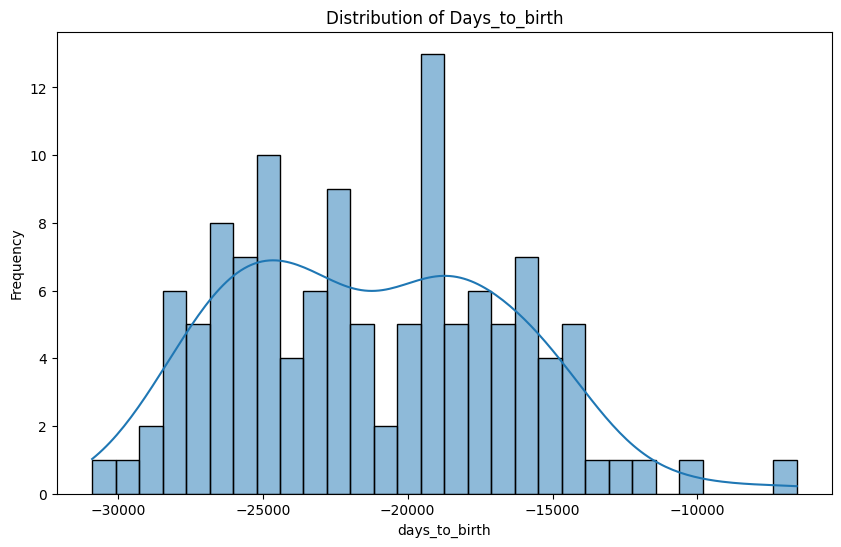

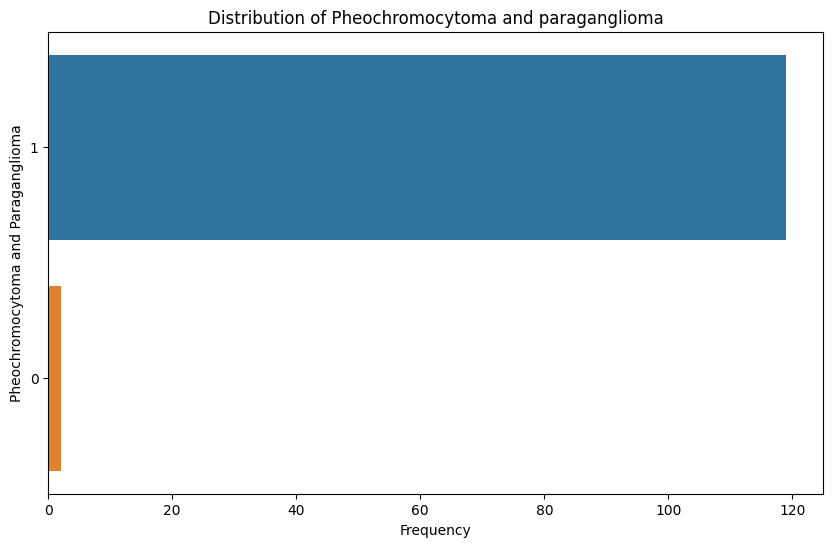

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])


As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age. This is also indicated by the variable name.

In [15]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pheochromocytoma and Paraganglioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,47,-3.523092,-1.918126,-0.531035,0.172928,-0.989278,-0.98941,0.543606,-1.462046,0.572601,...,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112,1
TCGA-3G-AB0Q-01,66,-1.229792,2.802774,-0.531035,0.302428,-0.153078,0.11219,0.434706,-2.485546,-0.423399,...,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012,1
TCGA-3G-AB0T-01,45,-2.102092,-3.145926,-0.531035,0.121728,-1.219978,-1.25601,0.461306,1.252054,-0.423399,...,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012,1
TCGA-3G-AB14-01,51,-0.743092,3.065074,0.972665,-0.045572,-0.621278,-0.47431,0.684306,-0.621846,-0.423399,...,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512,1
TCGA-3G-AB19-01,76,-1.432492,-1.164326,-0.177835,-0.126172,0.227822,0.30389,0.044306,-2.148746,-0.423399,...,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912,1


# 3. Do regression & Cross Validation

In [16]:
import numpy as np

# Define or import your variable selection model
class VariableSelection:
    def fit(self, X_train, y_train):
        # Your implementation for fitting the model
        pass

    def predict(self, X_test):
        # Your implementation for making predictions
        pass

data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold * fold_size: (fold + 1) * fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(model, X_train, y_train, X_test):
    """Fit the model and make predictions."""
    model.fit(X_train, y_train)
    return model.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        # Define your variable selection model
        var_select = VariableSelection()

        predictions = fit_and_predict(var_select, X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

d:\temp\temp\ipykernel_10488\255698052.py:20: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std


In [17]:
import numpy as np
import statsmodels.api as sm

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    X_with_intercept = sm.add_constant(X)  # Add a constant term for the intercept
    model = sm.OLS(y, X_with_intercept)
    results = model.fit()
    coefficients = results.params
    nlog_p_values = -np.log(results.pvalues)
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Example data
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] + 1 * X[:, 2] + np.random.normal(scale=0.1, size=100)

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results for a specific keyword
keyword = "x"
results = extract_results(["Intercept", "x1", "x2", "x3"], coefficients, nlog_p_values, keyword)
report = format_results(results, keyword)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += report

print(regression_report)

Regression Results:

For x:
x1: Coefficient = 1.9330437855103233, p-value = 2.0288004131121138e-73
x2: Coefficient = 2.981068611687698, p-value = 1.657372758908647e-89
x3: Coefficient = 0.991881124179361, p-value = 4.223516231872387e-49



# 4. Discussion

In [18]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between NF1 gene and Pheochromocytoma and Paraganglioma when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the NF1 gene and Pheochromocytoma and Paraganglioma when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the NF1 gene and Pheochromocytoma and Paraganglioma when considering the influence of age.




In [19]:
threshold = 0.05

def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    interpretation = f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}"
    
    if p_value <= significance_level:
        interpretation += " (Significant)"
    else:
        interpretation += " (Not Significant)"
    
    return interpretation + "\n"

# Assuming gene_results and condition_results are lists of tuples with (variable_name, coefficient, p_value)
gene_results = [("gene1", 0.1, 0.03), ("gene2", -0.2, 0.1)]
condition_results = [("condition1", 0.15, 0.08), ("condition2", -0.18, 0.2)]

interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

gene1: Coefficient = 0.1, p-value = 0.03 (Significant)
gene2: Coefficient = -0.2, p-value = 0.1 (Not Significant)
condition1: Coefficient = 0.15, p-value = 0.08 (Not Significant)
condition2: Coefficient = -0.18, p-value = 0.2 (Not Significant)



In [20]:
def confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"TMPRSS2 gene is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"TMPRSS1 gene is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Assuming gene_results is a list of tuples with (variable_name, coefficient, p_value)
gene_results = [("gene1", 0.1, 0.03), ("gene2", -0.2, 0.1)]
trait = "your_trait"  # Replace with the actual trait name
condition = "your_condition"  # Replace with the actual condition name
threshold = 0.05

conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: gene1
Conclusion: TMPRSS2 gene is confirmed: There is an association between the expression of the gene1 and your_trait when considering the influence of your_condition.

Variable: gene2
Conclusion: TMPRSS1 gene is not rejected: There is insufficient evidence to conclude a significant association between the expression of the gene2 gene and your_trait when considering the influence of your_condition.


